# Stock Price Prediction with Deep Learning(LSTM)



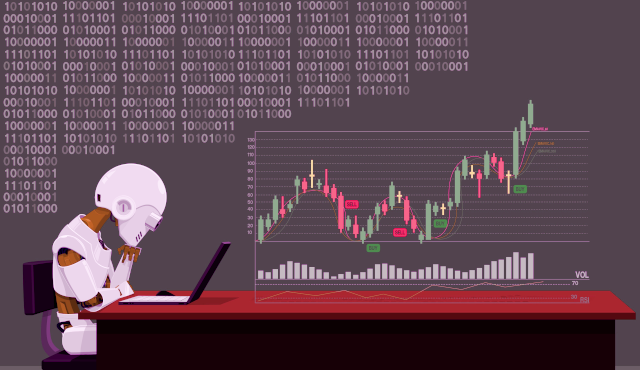

In [1]:
import pandas_datareader as webreader
import math 
import numpy as np 
import pandas as pd 
from datetime import date, timedelta
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import LSTM, Dense
from IPython.display import display , Markdown

# Loading the data

In [2]:
# Setting the timeframe for the data extraction
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2010-01-01'

# Getting S&P500 quotes
stockname = 'S&P500'
symbol = '^GSPC'
df = webreader.DataReader(
    symbol, start=date_start, end=date_today, data_source="yahoo"
)

# Taking a look at the shape of the dataset
print("Number of Rows in the dataset is:",df.shape[0])
print("Number of Columns in the dataset is:",df.shape[1])
display(Markdown('---'))
display(Markdown('##*The starting of the data looks like ...*'))
display(df.head(5))
display(Markdown('---'))
display(Markdown('##*The ending of the data looks like ...*'))
display(df.tail())

Number of Rows in the dataset is: 2857
Number of Columns in the dataset is: 6


---

##*The starting of the data looks like ...*

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,1127.640015,1114.810059,1126.599976,1115.099976,2076990000,1115.099976
2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990
2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020
2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015
2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941


---

##*The ending of the data looks like ...*

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-03,4209.390137,4188.029785,4191.979980,4192.660156,4061170000,4192.660156
2021-05-04,4179.040039,4128.589844,4179.040039,4164.660156,4441080000,4164.660156
2021-05-05,4187.720215,4160.939941,4177.060059,4167.589844,4029050000,4167.589844
2021-05-06,4202.700195,4147.330078,4169.140137,4201.620117,4504860000,4201.620117
2021-05-07,4238.040039,4201.640137,4210.339844,4232.600098,4013060000,4232.600098


# Exploring the data

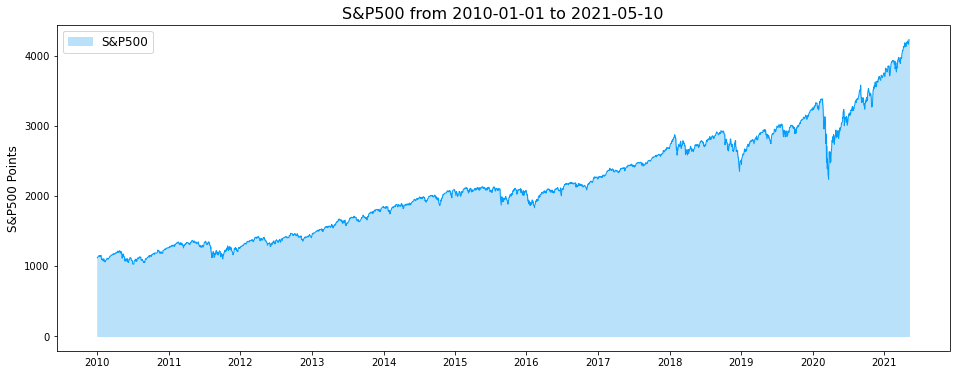

In [3]:
# Plotting the data
register_matplotlib_converters()
years = mdates.YearLocator() 
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)
x = df.index
y = df['Close']
ax1.fill_between(x, 0, y, color='#b9e1fa')
ax1.legend([stockname], fontsize=12)
plt.title(stockname + ' from '+ date_start + ' to ' + date_today, fontsize=16)
plt.plot(y, color='#039dfc', label=stockname, linewidth=1.0)
plt.ylabel('S&P500 Points', fontsize=12)
plt.show()

# Preprocessing

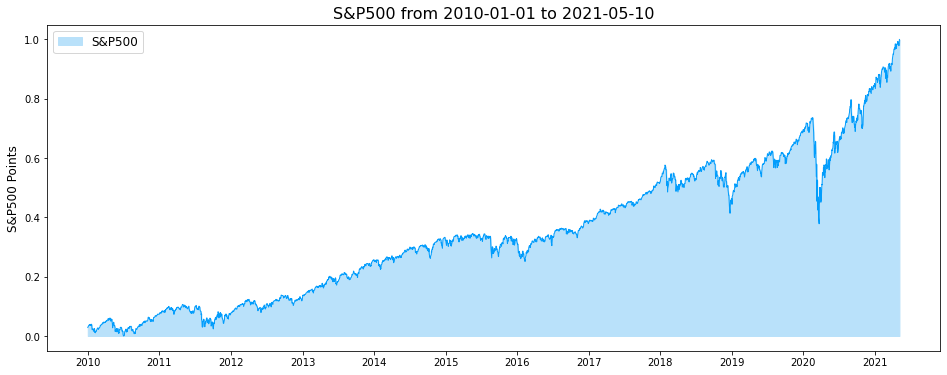

In [4]:
# Create a new dataframe with only the Close column and convert to numpy array
data = df.filter(['Close'])
npdataset = data.values

# Get the number of rows to train the model on 80% of the data 
training_data_length = math.ceil(len(npdataset) * 0.8)

# Transform features by scaling each feature to a range between 0 and 1
mmscaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = mmscaler.fit_transform(npdataset)
scaled_data


# Plotting the data
register_matplotlib_converters()
years = mdates.YearLocator() 
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)
x = df.index
yt = pd.DataFrame(index=df.index,data=scaled_data.flatten(),columns=['scaled'])#df['Close']
y = yt['scaled']
ax1.fill_between(x, 0, y, color='#b9e1fa')
ax1.legend([stockname], fontsize=12)
plt.title(stockname + ' from '+ date_start + ' to ' + date_today, fontsize=16)
plt.plot(y, color='#039dfc', label=stockname, linewidth=1.0)
plt.ylabel('S&P500 Points', fontsize=12)
plt.show()

##*The Data is divided into training and testing subparts*

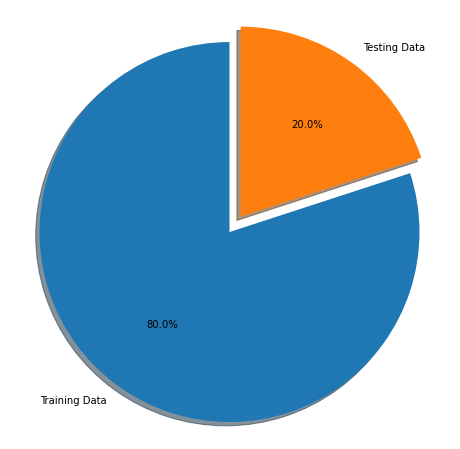

In [5]:
# Create a scaled training data set
train_data = scaled_data[0:training_data_length, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
trainingdatasize = len(train_data) 
for i in range(100, trainingdatasize):
    x_train.append(train_data[i-100: i, 0]) #contains 100 values 0-100
    y_train.append(train_data[i, 0]) #contains all other values

# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#print(x_train.shape)
#print(y_train.shape)
#print(x_train[0][1][0], y_train[1])

#Plotting the training and testing split
display(Markdown('##*The Data is divided into training and testing subparts*'))
labels = ['Training Data', 'Testing Data']
training_data_size_viz = training_data_length/df.shape[0]
sizes = [training_data_size_viz*100,(1-training_data_size_viz)*100]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Model Training

In [6]:
# Configure the neural network model
model = Sequential()

# Model with 100 Neurons 
# inputshape = 100 Timestamps
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
# Training the model
history = model.fit(x_train, y_train, batch_size=16, epochs=25,validation_split=0.2)

Epoch 1/25
110/110 [==============================] - 22s 124ms/step - loss: 0.0070 - val_loss: 2.7647e-04
Epoch 2/25
110/110 [==============================] - 11s 100ms/step - loss: 1.1700e-04 - val_loss: 2.6081e-04
Epoch 3/25
110/110 [==============================] - 12s 109ms/step - loss: 1.1609e-04 - val_loss: 2.4536e-04
Epoch 4/25
110/110 [==============================] - 11s 103ms/step - loss: 1.2142e-04 - val_loss: 3.0993e-04
Epoch 5/25
110/110 [==============================] - 11s 102ms/step - loss: 1.2602e-04 - val_loss: 2.2244e-04
Epoch 6/25
110/110 [==============================] - 11s 100ms/step - loss: 9.7966e-05 - val_loss: 3.5545e-04
Epoch 7/25
110/110 [==============================] - 10s 87ms/step - loss: 1.1673e-04 - val_loss: 2.0358e-04
Epoch 8/25
110/110 [==============================] - 10s 90ms/step - loss: 8.6540e-05 - val_loss: 1.9521e-04
Epoch 9/25
110/110 [==============================] - 12s 105ms/step - loss: 9.7876e-05 - val_loss: 2.1438e-04
Epoch 1

##Loss is reducing as the system is learning

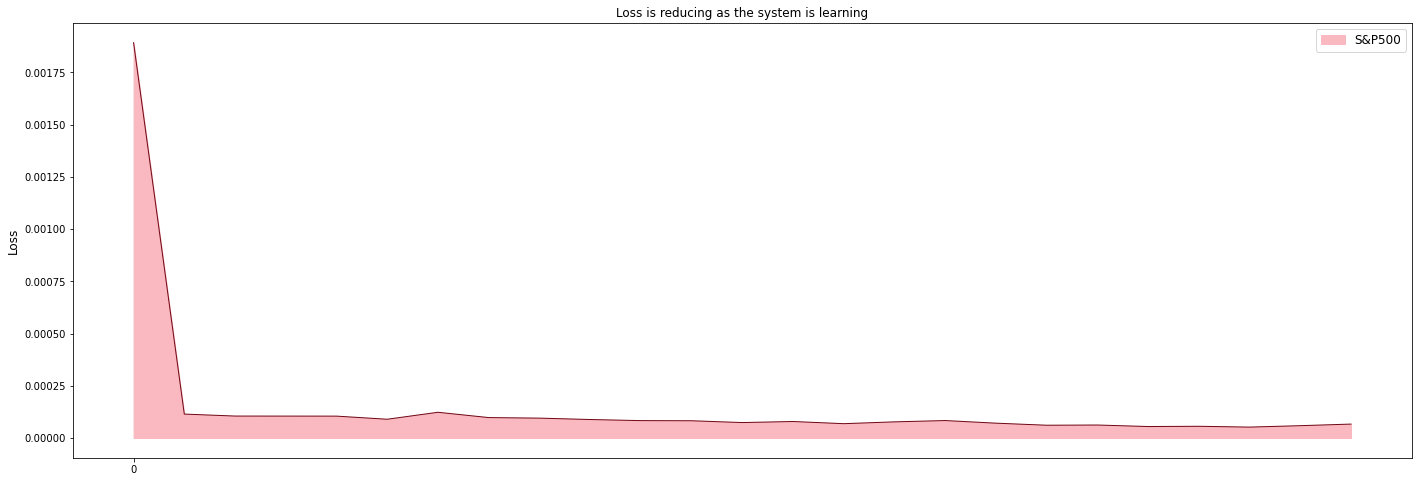

In [8]:
display(Markdown('##Loss is reducing as the system is learning'))
register_matplotlib_converters()
years = mdates.YearLocator() 
fig, ax1 = plt.subplots(figsize=(24, 8))
ax1.xaxis.set_major_locator(years)
x = np.linspace(0,24,25)
y = history.history['loss']
ax1.fill_between(x, 0, y, color='#fab9c1')
ax1.legend([stockname], fontsize=12)
plt.title("Loss is reducing as the system is learning")
plt.plot(y, color='#710815', label="Loss", linewidth=1.0)
plt.ylabel('Loss', fontsize=12)
plt.show()

In [9]:
# Create a new array containing scaled test values
test_data = scaled_data[training_data_length - 100:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = npdataset[training_data_length:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data, so that we get an array with multiple test datasets
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:
# Get the predicted values
predictions = model.predict(x_test)
predictions = mmscaler.inverse_transform(predictions)

# Evaluate model performance

###The Evaluation of the Models Performance

>-The Mean Absolute Error is : 39.1

>-The Root Mean Squared Error: 20.1

---

<br/>

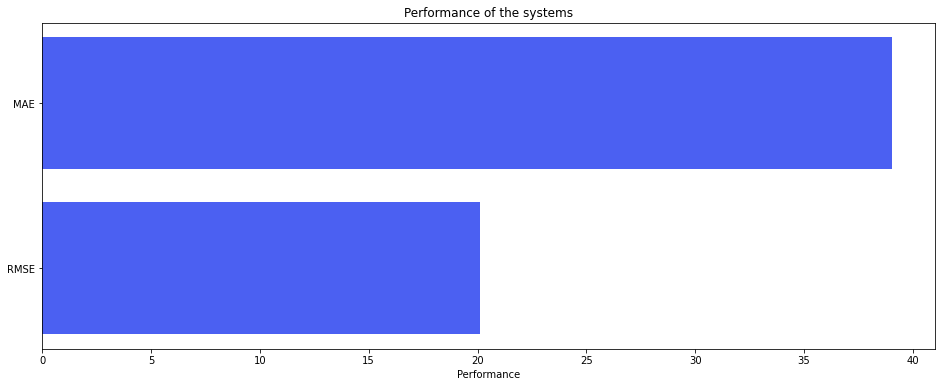

In [11]:
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(predictions, y_test)
display(Markdown('###The Evaluation of the Models Performance'))
display(Markdown('>-The Mean Absolute Error is : ' + str(round(mae, 1))))

# Calculate the root mean squarred error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
display(Markdown('>-The Root Mean Squared Error: ' + str(round(rmse, 1))))

display(Markdown('---'))
display(Markdown('<br/>'))

#Plotting performance
fig, ax = plt.subplots(figsize=(16,6))

# Example data
performance = ('MAE', 'RMSE')
y_pos = np.arange(len(performance))
measure = list()
measure.append(mae)
measure.append(rmse)

ax.barh(y_pos, measure, align='center',color='#4b60f2')
ax.set_yticks(y_pos)
ax.set_yticklabels(performance)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Performance of the systems')

plt.show()

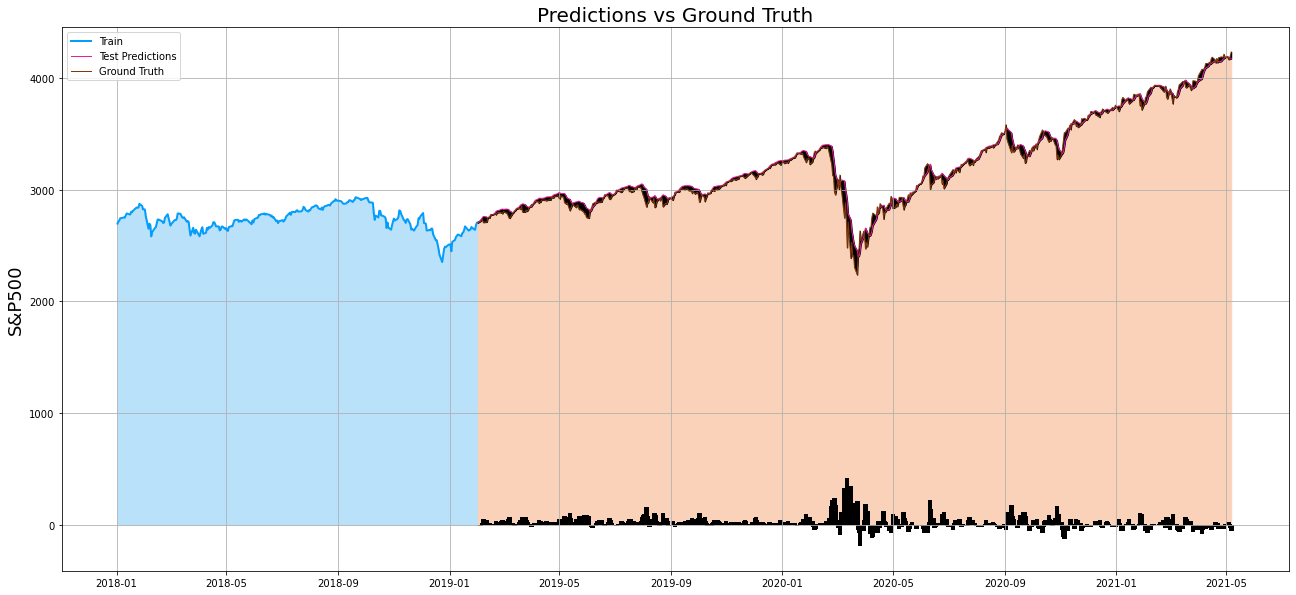

In [12]:
# The date from which on the date is displayed
display_start_date = "2018-01-01" 

# Add the difference between the valid and predicted prices
train = data[:training_data_length + 1]
valid = data[training_data_length:]
valid.insert(1, "Predictions", predictions, True)
valid.insert(1, "Difference", valid["Predictions"] - valid["Close"], True)

# Zoom in to a closer timeframe
valid = valid[valid.index > display_start_date]
train = train[train.index > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train.index; yt = train[["Close"]]
xv = valid.index; yv = valid[["Close", "Predictions"]]
plt.title("Predictions vs Ground Truth", fontsize=20)
plt.ylabel(stockname, fontsize=18)
plt.plot(yt, color="#039dfc", linewidth=2.0)
plt.plot(yv["Predictions"], color="#E91D9E", linewidth=1.0)
plt.plot(yv["Close"], color="#833809", linewidth=1.0)
plt.legend(["Train", "Test Predictions", "Ground Truth"], loc="upper left")

# Fill between plotlines
ax1.fill_between(xt, 0, yt["Close"], color="#b9e1fa")
ax1.fill_between(xv, 0, yv["Predictions"], color="#fad2b9")
ax1.fill_between(xv, yv["Close"], yv["Predictions"], color="black") 

# Create the bar plot with the differences
x = valid.index
y = valid["Difference"]
plt.bar(x, y, width=5, color="black")
plt.grid()
plt.show()

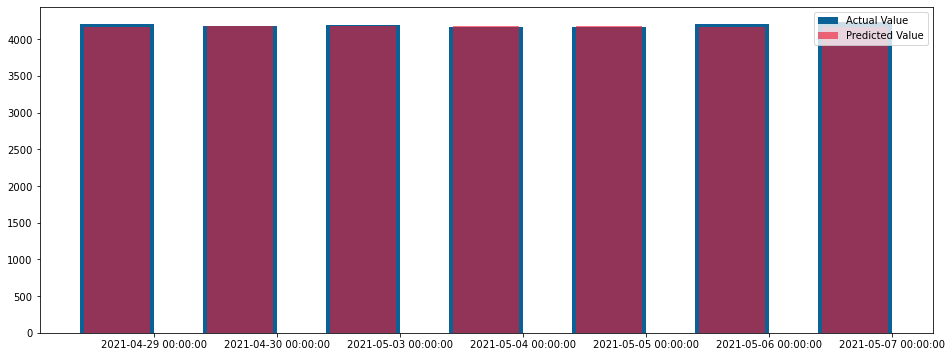

In [13]:
# Show the valid and predicted prices
dif = valid['Close'] - valid['Predictions']
#valid.insert(2, 'Difference', dif, True)
valid.tail(5)


#Plotting the difference
fig, ax1 = plt.subplots(figsize=(16, 6))

width = 0.6

highPower   = list(valid.tail(7)['Close'])
lowPower    = list(valid.tail(7)['Predictions'])

indices = np.arange(len(highPower))

plt.bar(indices, highPower, width=width, 
        color='#0b6096', label='Actual Value')
plt.bar(indices, lowPower, 
        width=0.9*width, color='#ee1530', alpha=0.6, label='Predicted Value')

plt.xticks(indices+width/2, 
           list(valid.tail(7).index) )

plt.legend()

plt.show()


# Predict next day's price

In [16]:
# Get fresh data until today and create a new dataframe with only the price data
price_quote = webreader.DataReader(symbol, data_source='yahoo', start=date_start, end=date_today)
new_df = price_quote.filter(['Close'])

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = mmscaler.transform(new_df[-100:].values)

# Create an empty list and Append past 100 days
X_test = []
X_test.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price, undo the scaling and output the predictions
pred_price = model.predict(X_test)
pred_price = mmscaler.inverse_transform(pred_price)
date_tomorrow = date.today() + timedelta(days=1)
display(Markdown('## The price for ' + stockname + ' at ' + date_today + ' closing time was: ' + '*' + str(round(df.at[df.index.max(), 'Close'])) + '*'))
display(Markdown('## The predicted ' + stockname + ' price at date ' + str(date_tomorrow) + ' at closing will be: ' + '*' + str(round(pred_price[0, 0], 0)) + '*'))

## The price for S&P500 at 2021-05-10 closing time was: *4233*

## The predicted S&P500 price at date 2021-05-11 at closing will be: *4188.0*

In [19]:
# Get fresh data until today and create a new dataframe with only the price data
price_quote = webreader.DataReader(symbol, data_source='yahoo', start=date_start, end=date_today)
new_df = price_quote.filter(['Open'])

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = mmscaler.transform(new_df[-100:].values)

# Create an empty list and Append past 100 days
X_test = []
X_test.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price, undo the scaling and output the predictions
pred_price = model.predict(X_test)
pred_price = mmscaler.inverse_transform(pred_price)
date_tomorrow = date.today() + timedelta(days=1)
display(Markdown('## The price for ' + stockname + ' at ' + date_today + ' opening time was: ' + '*' + str(round(df.at[df.index.max(), 'Open'])) + '*'))
display(Markdown('## The predicted ' + stockname + ' price at date ' + str(date_tomorrow) + ' at opening will be: ' + '*' + str(round(pred_price[0, 0], 0)) + '*'))

## The price for S&P500 at 2021-05-10 opening time was: *4210*

## The predicted S&P500 price at date 2021-05-11 at opening will be: *4177.0*